## CAPSTONE PROJECT : PROJECT WALMART ##

In [1]:
# importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [2]:
# load the csv data
df = pd.read_excel("Walmart .csv.xlsx")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


<h2> 1. You are provided with the weekly sales data for their various outlets. Use statistical
 analysis, EDA, outlier analysis, and handle the missing values to come up with various
 insights </h2>

In [3]:
# data handling
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [4]:
# to know the first five rows
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
# helps to define all statistics of the dataset
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


In [6]:
# to check the null values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
# to check the duplicated values
df.duplicated().sum()

np.int64(0)

In [8]:
# shows all the columns
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of Weekly Sales')

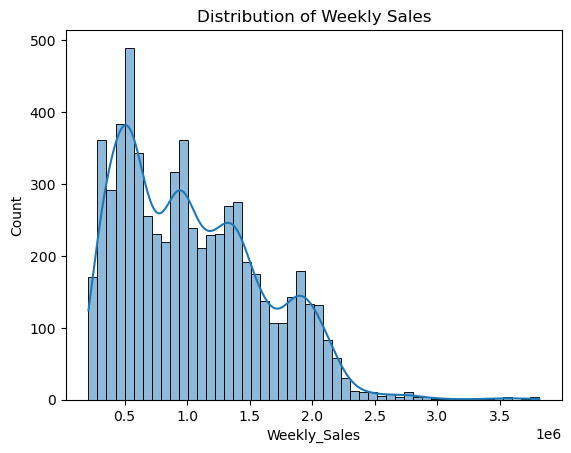

In [9]:
# Exploratary data analysis
sns.histplot(df['Weekly_Sales'], bins = 50, kde = True) # describe the distribution of weekly sales
plt.title('Distribution of Weekly Sales')

<Axes: title={'center': 'Total Sales by store'}, xlabel='Store'>

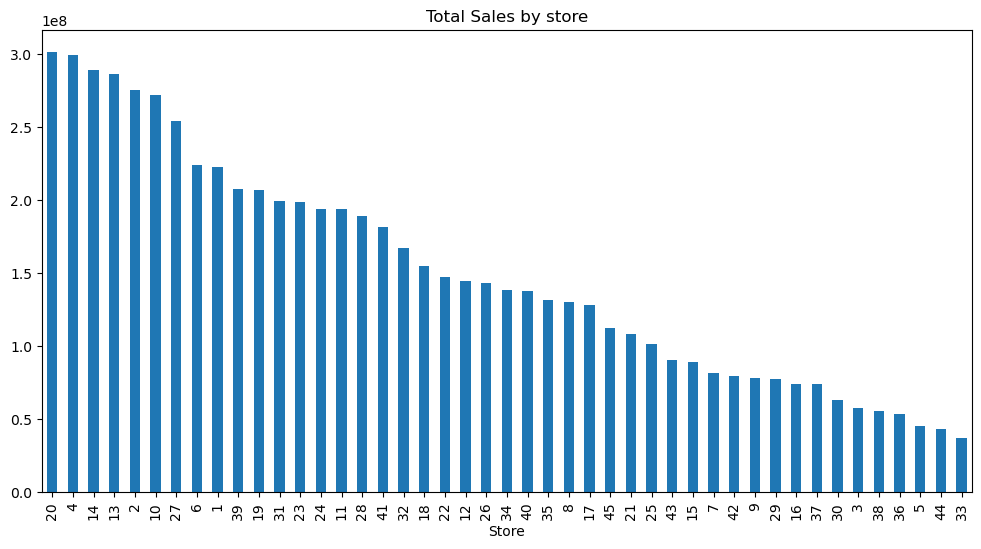

In [10]:
# we grouping store and weekly sales value in descending order to show on the graph that represent weekly sales by each store.
store_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending = False) # shows total sales by each stores
store_sales.plot(kind = 'bar', figsize = (12,6), title = 'Total Sales by store')

<Axes: title={'center': 'Average Sales: Holiday vs Non-Holiday'}, xlabel='Holiday_Flag'>

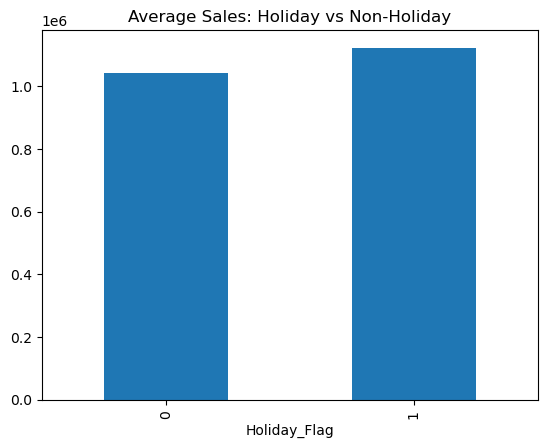

In [11]:
# we are trying to check which days has more sales Holiday or non-holiday. 
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean() # comparison between sales on holiday and non-holiday
holiday_sales.plot(kind='bar', title='Average Sales: Holiday vs Non-Holiday')

<Axes: >

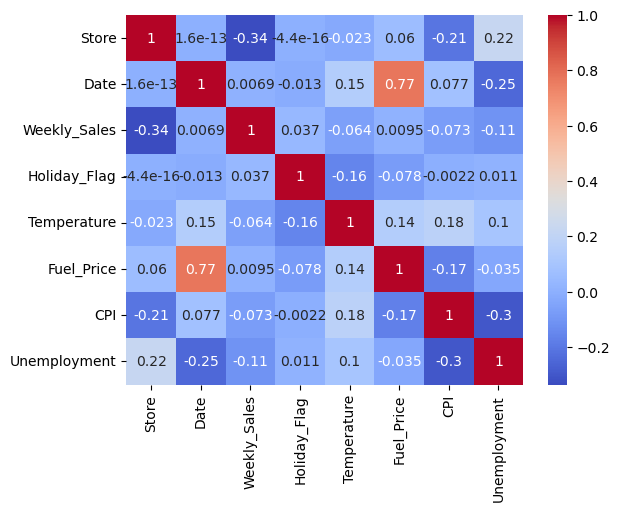

In [12]:
# to see the correlation of the dataset.
sns.heatmap(df.corr() , annot = True , cmap = 'coolwarm')

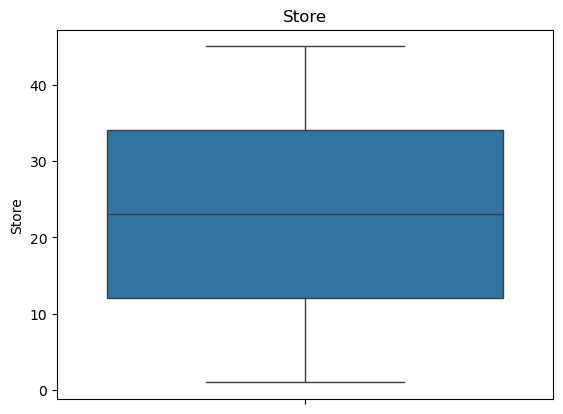

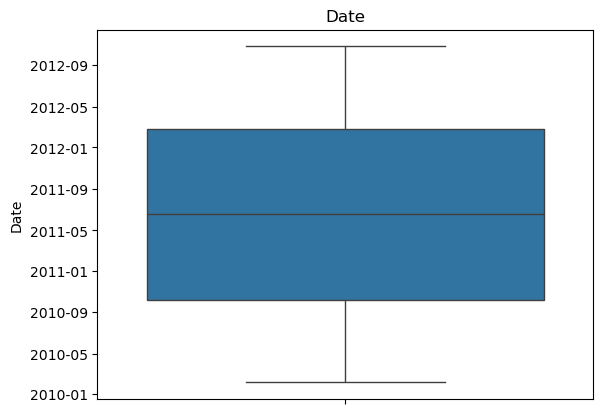

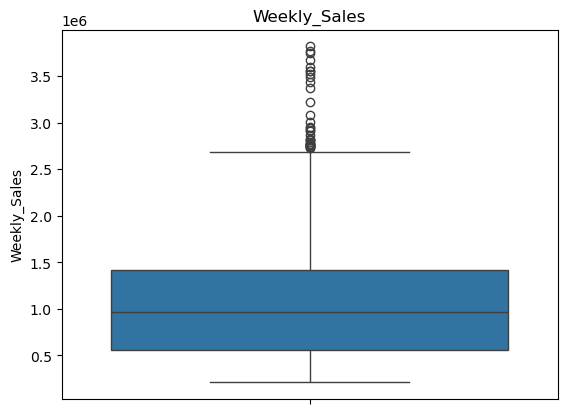

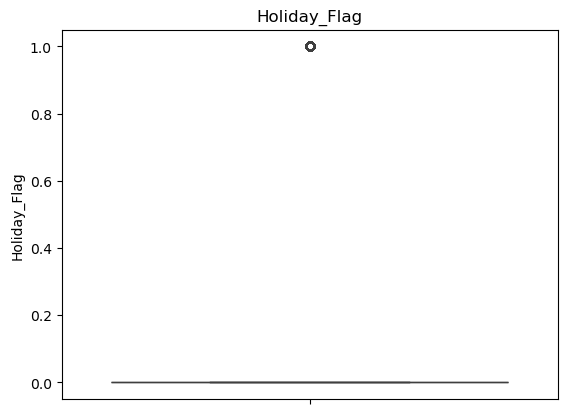

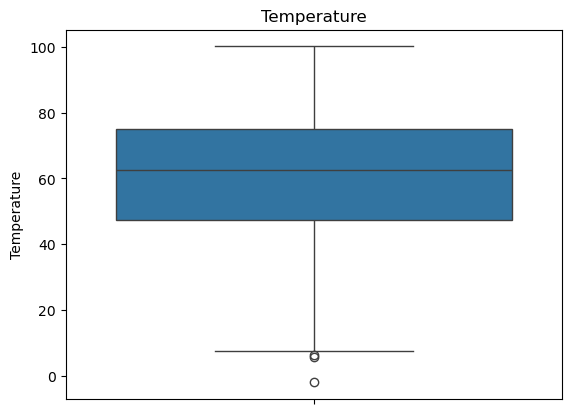

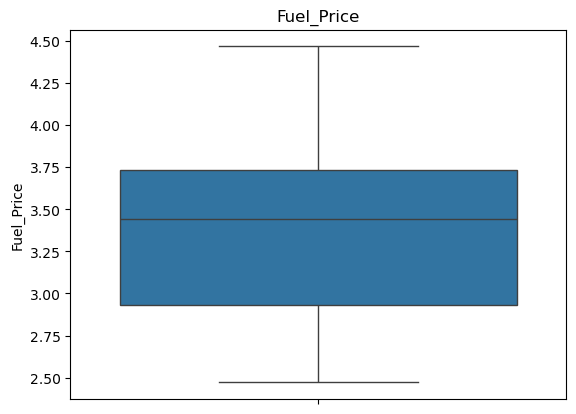

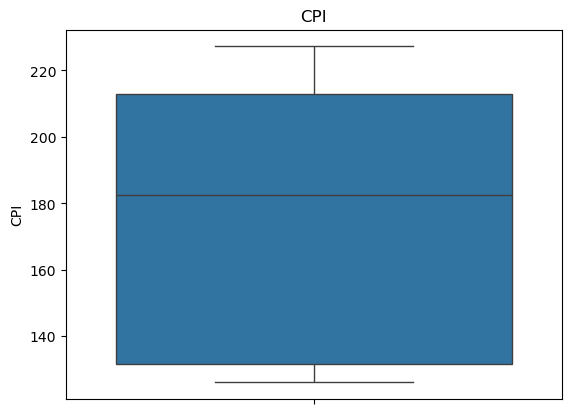

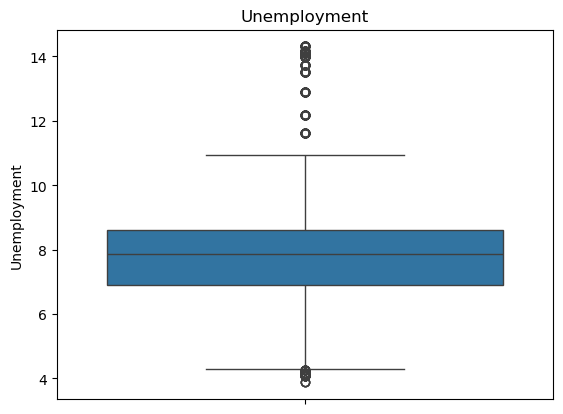

In [13]:
# to see the outliers in the columns
for i in df.columns:
    if df[i].dtypes == 'int64' or 'float64':
        sns.boxplot(df[i])
        plt.title(i)
        plt.show()

In [14]:
# To handle the Outliers by IQR Method.
for i in df.columns:
    if df[i].dtypes == 'int64' or 'float64':
        # first step = take Q1 and Q3
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3-q1 #IQR = Inter quantile range

        LB = q1 - 1.5*iqr # Lower Bound
        UB = q3 + 1.5*iqr # Upper Bound

        df = df[(df[i] >= LB) & (df[i] <= UB)]

In [15]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


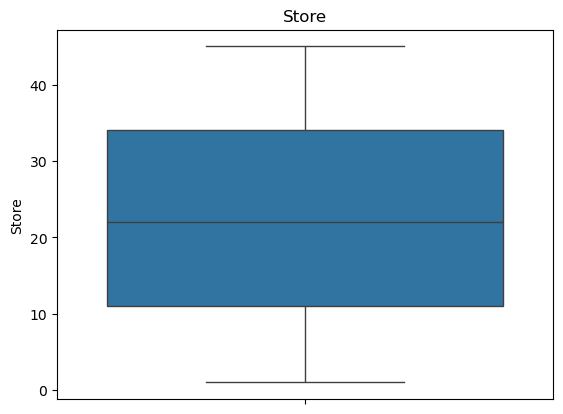

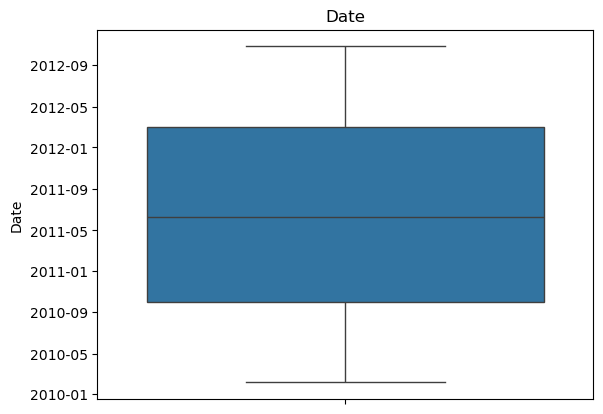

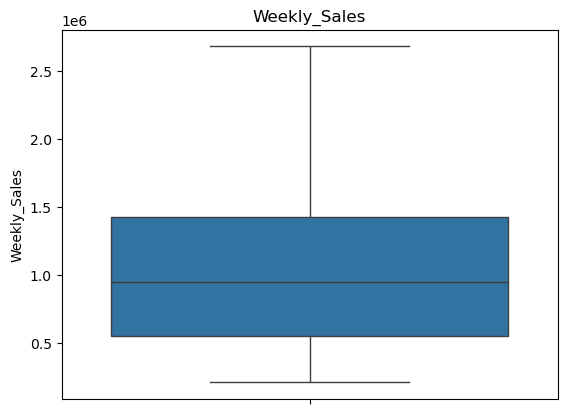

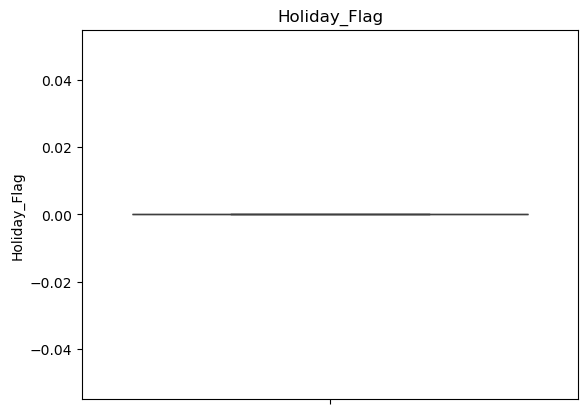

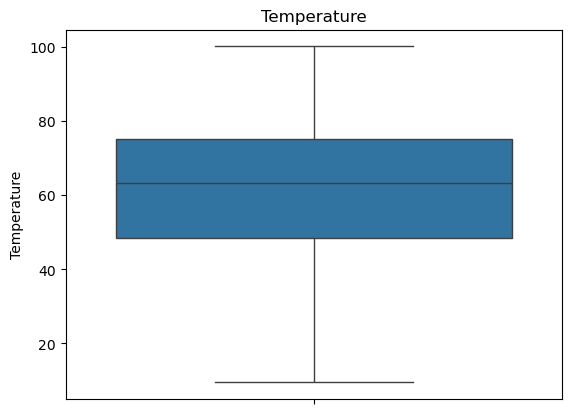

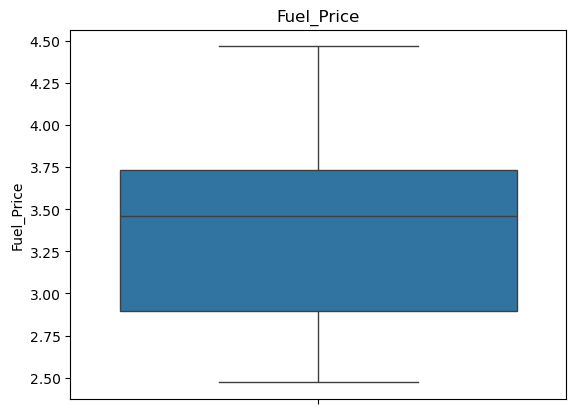

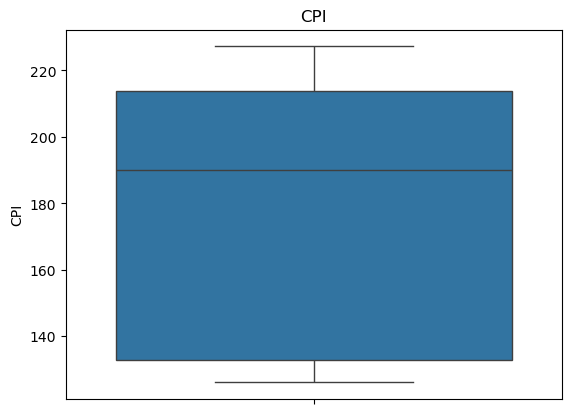

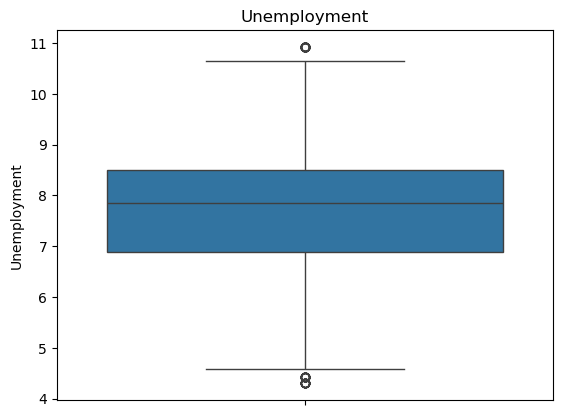

In [16]:
# to see the columns have outliers or not after handling it.
for i in df.columns:
    if df[i].dtypes == 'int64' or 'float64':
        sns.boxplot(df[i]) # use to make a boxplot of columns with int64 and float64 datatypes
        plt.title(i)
        plt.show()

<h2> 1. (a)If the weekly sales are affected by the unemployment rate, if yes - which stores
 are suffering the most? </h2>

In [17]:
# to see that weelkly sales are affected by the unemployment rate or not

correlation = df['Weekly_Sales'].corr(df['Unemployment']) # define the relation between the weekly sales and unemployment column
print(f"Correlation between Weekly Sales and Unemployment: {correlation:.3f}")

Correlation between Weekly Sales and Unemployment: -0.074


In [18]:
# negative correlation suggest that higher unemployment is associated with lower sales.
# and yes weekly sales are affected by the unemploment as higher the unemployment lowest the weekly sales.

In [19]:
# step1 : we groupby the relation of weekly sales and unemployment with store columns.
store_corrs = df.groupby('Store').apply(lambda x: x['Weekly_Sales'].corr(x['Unemployment']))
# step2 : we drop the null values and sort the values from negative to positive
store_corrs = store_corrs.dropna().sort_values()
# step3 : print
print(store_corrs)

Store
44   -0.801376
4    -0.658851
39   -0.427695
13   -0.384296
41   -0.382718
42   -0.370802
17   -0.300018
5    -0.286733
3    -0.275226
23   -0.238563
37   -0.222974
9    -0.218896
7    -0.210632
40   -0.204354
43   -0.189542
38   -0.178827
28   -0.147135
32   -0.124257
1    -0.118566
31   -0.093736
20   -0.091113
16   -0.074211
8    -0.067215
26   -0.061200
11   -0.029992
24   -0.007847
34   -0.000017
27    0.007581
6     0.012685
12    0.021629
45    0.031180
25    0.031310
2     0.041425
22    0.053274
15    0.091438
29    0.092232
33    0.110544
19    0.112347
18    0.161418
10    0.192098
30    0.208538
21    0.230291
14    0.341700
35    0.559067
36    0.839923
dtype: float64


C:\Users\Suraj VK\AppData\Local\Temp\ipykernel_19744\1944876438.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  store_corrs = df.groupby('Store').apply(lambda x: x['Weekly_Sales'].corr(x['Unemployment']))


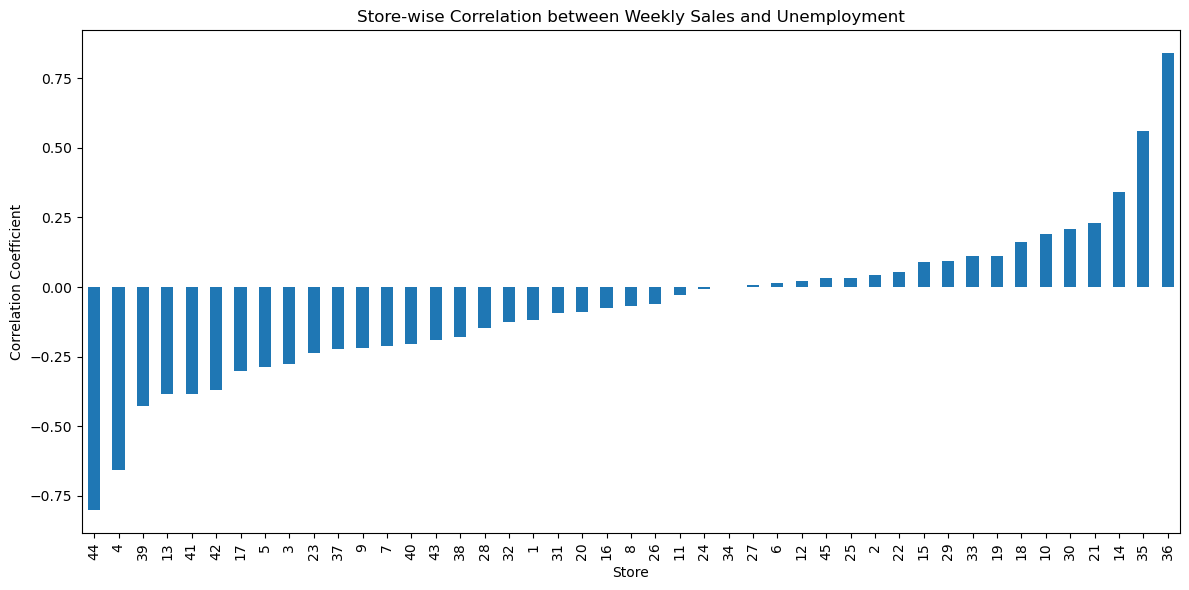

In [20]:
# visualize the weekly sales and unemployment relation.
store_corrs.plot(kind='bar', figsize=(12,6), title='Store-wise Correlation between Weekly Sales and Unemployment')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Store')
plt.tight_layout()
plt.show()

Answer : Most suffering store number by the relation of weekly sales and unemployment is store no. 44 

why = Because the correlation between weekly sales and unemployment of store no 44 is the most negative correlation which shows the 
weekly sales are highly affected by the unemployment there because the highest the unemployment lowest the sales.

<h2>1.(b) If the weekly sales show a seasonal trend, when and what could be the reason?</h2>

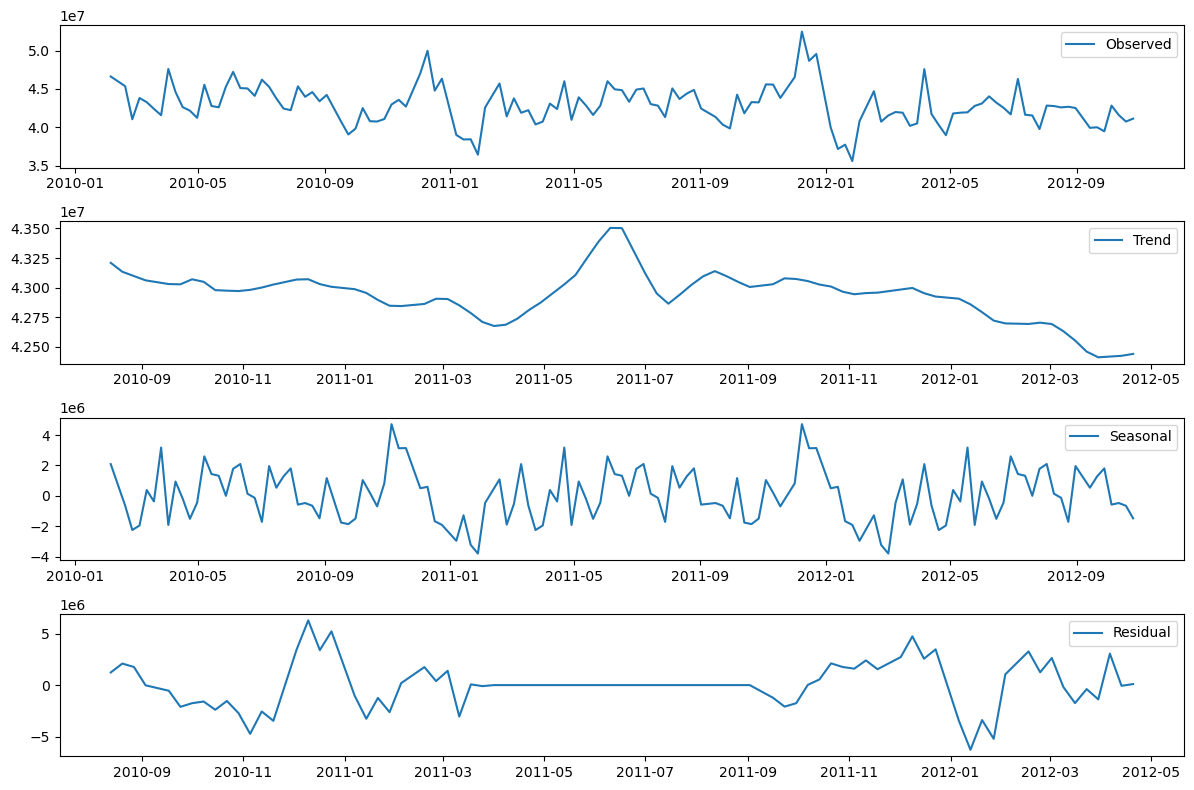

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Aggregate weekly sales across all stores (or choose one store if needed)
weekly_sales = df.groupby('Date')['Weekly_Sales'].sum()

# Ensure the index is datetime for time series analysis
weekly_sales.index = pd.to_datetime(weekly_sales.index)

decomposition = seasonal_decompose(weekly_sales, model='additive', period=52)  # 52 weeks in a year
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend()
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()
plt.tight_layout()
plt.show()


Yes, weekly sales do show seasonal trends, especially around major and weather related-periods. 

These trends are driven by consumer behavior, promotional campaingns, and external economic factors.

What could be the reason?

The reason behind the seasonality is so many like Holiday promotions and marketing , consumer behaviour , temperature and weather influence etc.,
like at the 
1. Holiday promotions - Walmart uses aggressive marketing and discounts during holidays.

2. Consumer behavior - shoppers tend to buy more during festive periods and events.

3. Inventory :- Sudden spikes in demand can lead to stockouts or overstocking.

When it is going to occured ?

Seasonality is occurs on the seasonal trends like holiday Season (Nov - Dec) due to christmas , diwali and on the time of many more festivals.
at summer vacation people tends to hang out more so the sales at that time higher than average sales.


## 1.(c) Does temperature affect the weekly sales in any manner?

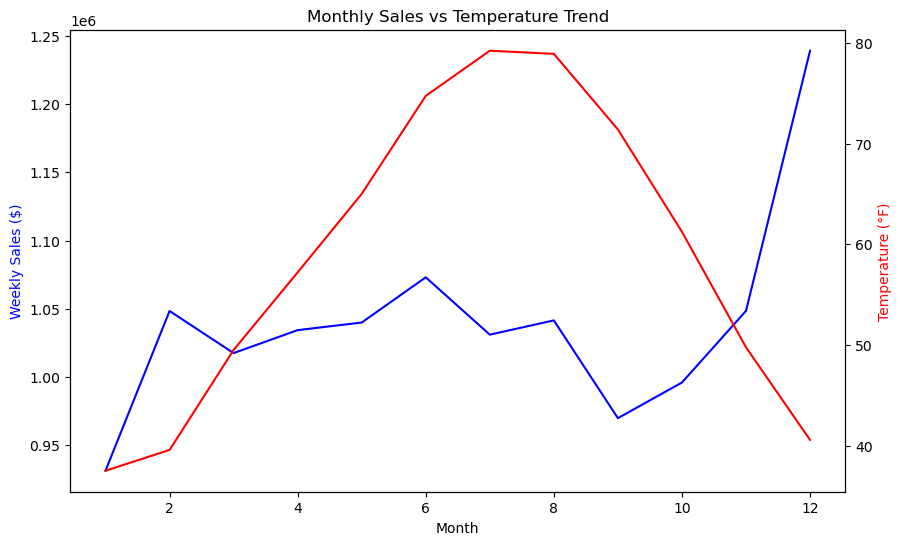

In [22]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

# Average sales and temperature by month
monthly = df.groupby('Month')[['Weekly_Sales', 'Temperature']].mean().reset_index()

# Dual-axis plot
fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()
ax1.plot(monthly['Month'], monthly['Weekly_Sales'], color='blue', label='Weekly Sales')
ax2.plot(monthly['Month'], monthly['Temperature'], color='red', label='Temperature')

ax1.set_xlabel('Month')
ax1.set_ylabel('Weekly Sales ($)', color='blue')
ax2.set_ylabel('Temperature (°F)', color='red')
plt.title('Monthly Sales vs Temperature Trend')
plt.show()

Answer :- Yes, temperature does affect weekly sales at walmart, but its impact varies by season, region, and prodcut category. 
Warmer or colder weather can either boost or surpress demand depending on the context.

1. In the above plot shows that in the starting of the year(jan-feb) weekly sales are high due to post holiday essentials and winter gear.

2. But at the march and april time the average sales are moderate due to high temperature.

3. then there is increase in sales at the summer vacation (mid jun-july) as at the vacation time people tends to buy summer items.

4. at the late august the sales goes down because of the raining people are not going to the walmart for shopping so at that time average week sales are less.

5. we can see the highly increase in the weekly sales after the month of the october because of the winter promotions , winter vacation and due to low temperature the sales of the winter clothes is going to be very high as the temperature continous falling.



 ## 1.(d) How is the Consumer Price index affecting the weekly sales of various stores?

correlation between Weekly sales and CPI:
               Weekly_Sales       CPI
Weekly_Sales      1.000000 -0.084136
CPI              -0.084136  1.000000


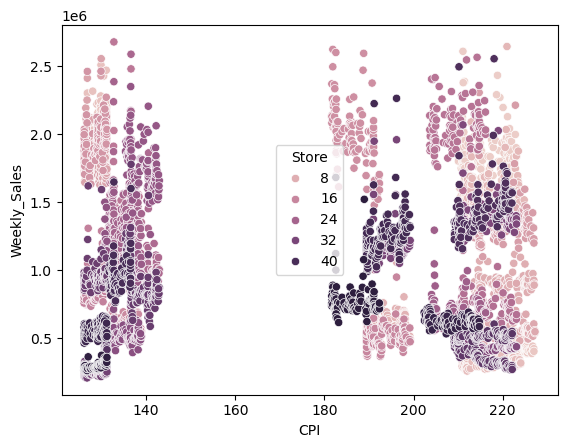

In [23]:
# correlation analysis

correlation = df[['Weekly_Sales', 'CPI']].corr() # first we see the realtion between weekly sales and CPI.
print("correlation between Weekly sales and CPI:\n", correlation)

#Scatter Plot     

sns.scatterplot(data = df, x = 'CPI', y = 'Weekly_Sales', hue = 'Store')
plt.title
plt.show()

Above Scatter plot shows the correlation of the weekly sales and CPI that how much each store affected by the CPI in their weekly sales.

we can see that most of the stores are negatively correlated from the CPI which shows the inverse relationship of the CPI with weekly sales.

In [24]:
# here we are going to see the relation between weekly sales and CPI of each stores .
store_cpi_corr = df.groupby('Store')[['Weekly_Sales', 'CPI']].corr().iloc[0::2, -1] # we select the store column as a index and define the relation between weekly sales and CPI according to each store.
print(store_cpi_corr)

Store              
1      Weekly_Sales    0.237204
2      Weekly_Sales   -0.059454
3      Weekly_Sales    0.358675
4      Weekly_Sales    0.685116
5      Weekly_Sales    0.373201
6      Weekly_Sales    0.035245
7      Weekly_Sales    0.308721
8      Weekly_Sales    0.136702
9      Weekly_Sales    0.322639
10     Weekly_Sales   -0.139626
11     Weekly_Sales    0.075134
12     Weekly_Sales   -0.232470
13     Weekly_Sales    0.384633
14     Weekly_Sales   -0.570660
15     Weekly_Sales   -0.185315
16     Weekly_Sales    0.119545
17     Weekly_Sales    0.414722
18     Weekly_Sales   -0.209314
19     Weekly_Sales   -0.165261
20     Weekly_Sales    0.189608
21     Weekly_Sales   -0.176009
22     Weekly_Sales   -0.047142
23     Weekly_Sales    0.266321
24     Weekly_Sales   -0.018693
25     Weekly_Sales   -0.016759
26     Weekly_Sales    0.126316
27     Weekly_Sales   -0.281804
28     Weekly_Sales   -0.160638
29     Weekly_Sales   -0.079709
30     Weekly_Sales   -0.304402
31     Weekly_Sales 

Answer :- The Consumer Price Index (CPI) shows a moderate inverse relationship with weekly sales at walmart stores- when CPI rises(indicating inflation), weekly sales tend to decline slightly, especially for non - essential goods.

1. CPI measures inflation by tracking the average change in prices paid by consumers for goods and services.

2. A higher CPI means consumers are paying more, which can reduce their disposable income and shift spending toward essentials.

## 1.(e) Top performing stores according to the historical data.

In [25]:
# firstly we groupby the store with the sum of sales to know the total sales by each store till present.
top_stores = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending = False)
# then print the top stores which have the highest sales till now.
print(top_stores.head(10)) 

Store
20    2.632513e+08
14    2.578435e+08
13    2.527026e+08
2     2.479294e+08
10    2.404315e+08
4     2.301370e+08
27    2.291157e+08
1     2.057453e+08
6     2.042195e+08
39    1.919343e+08
Name: Weekly_Sales, dtype: float64


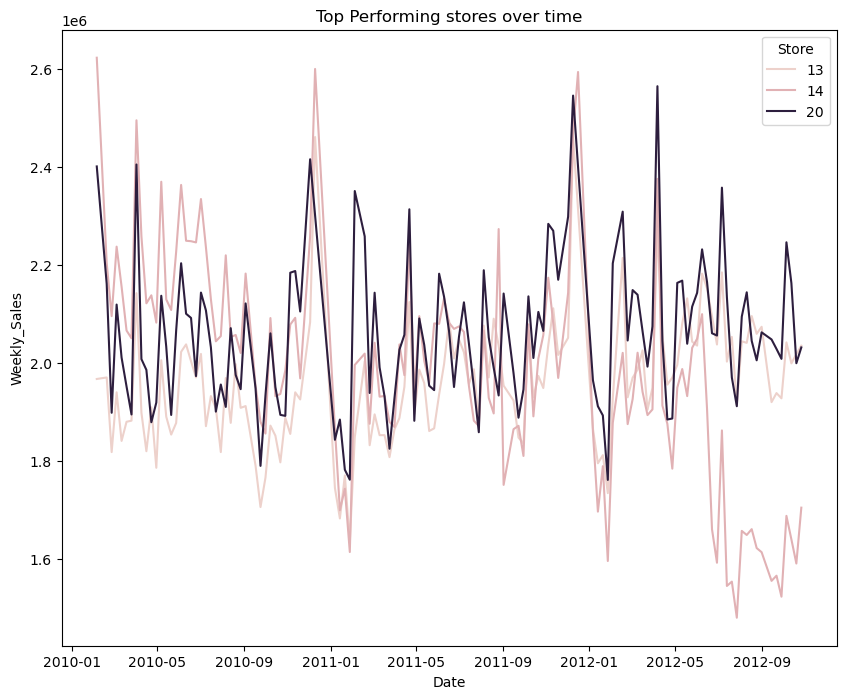

In [26]:
# visualization of the top performing stores
top_stores_ids = top_stores.head(3).index.tolist() #1. we make list of the top 3 performing store.
df_top = df[df['Store'].isin(top_stores_ids)]# 2. take store in the top store ids to know which of the three are top perfoming.
plt.figure(figsize=(10,8))# 3. Size the image according to the data.
sns.lineplot(data = df_top, x = 'Date', y = 'Weekly_Sales', hue = 'Store')# 4. puting the top performing stores in the line plot with date.
plt.title('Top Performing stores over time')# 5. putting the title 
plt.show()

Answer :- The top Performing stores are 13, 14 and 20 according to the historical data.

## 1.(f) The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [27]:
# Group by store and sum weekly sales
store_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values()

# Identify worst and best performing stores
worst_store = store_sales.idxmin()
best_store = store_sales.idxmax()
worst_sales = store_sales.min()
best_sales = store_sales.max()

# Calculate difference and percentage gap
absolute_diff = best_sales - worst_sales
percent_diff = (absolute_diff / best_sales) * 100

print(f"Worst Performing Store: Store {worst_store} with total sales ${worst_sales:,.2f}")
print(f"Best Performing Store: Store {best_store} with total sales ${best_sales:,.2f}")
print(f"Difference: ${absolute_diff:,.2f} ({percent_diff:.2f}%)")

Worst Performing Store: Store 38 with total sales $6,857,104.07
Best Performing Store: Store 20 with total sales $263,251,251.29
Difference: $256,394,147.22 (97.40%)


## 2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

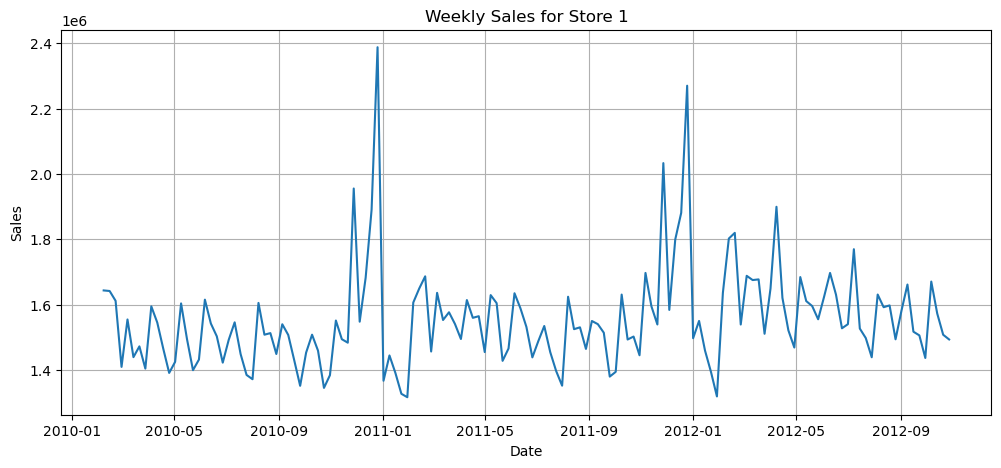

In [31]:
# Visualisation for store 1 weekly sales over the years.
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel('Walmart .csv.xlsx')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(['Store', 'Date'])

# Filter for one store (e.g., Store 1)
store_df = df[df['Store'] == 1].set_index('Date')
store_sales = store_df['Weekly_Sales'].resample('W').sum()

# Plot
plt.figure(figsize=(12, 5))
plt.plot(store_sales)
plt.title('Weekly Sales for Store 1')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [34]:
!pip show xgboost

In [35]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   - -------------------------------------- 3.4/72.0 MB 27.5 MB/s eta 0:00:03
   -- ------------------------------------- 3.9/72.0 MB 9.2 MB/s eta 0:00:08
   -- ------------------------------------- 5.2/72.0 MB 10.9 MB/s eta 0:00:07
   --- ------------------------------------ 6.6/72.0 MB 7.8 MB/s eta 0:00:09
   ---- ----------------------------------- 7.6/72.0 MB 7.1 MB/s eta 0:00:10
   ---- ----------------------------------- 8.7/72.0 MB 6.6 MB/s eta 0:00:10
   ----- ---------------------------------- 9.2/72.0 MB 6.2 MB/s eta 0:00:11
   ----- ---------------------------------- 10.5/72.0 MB 6.1 MB/s eta 0:00:11
   ------ --------------------------------- 12.1/72.0 MB 6.1 MB/s eta 0:00:10
   ------ --------------------------------- 12.6/72.0 MB 6.0 MB/s eta 0:00:10
   ------- -------------------------------- 13.6/72.0 MB 5.7 MB/s eta 0:00:11
   -------- ------------------------------- 14.4/72.0 MB 5.5 MB/s eta 0:00:11

In [37]:
# 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [38]:
# Feature Engineering = making columns of week month and year
df['Week'] = df['Date'].dt.isocalendar().week
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


 Training XGBoost for Store 1
MAE: 42724.11


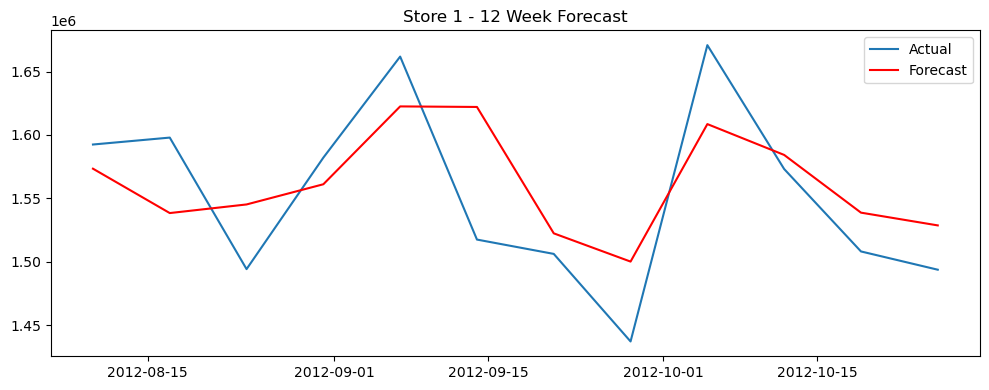


 Training XGBoost for Store 2
MAE: 42736.66


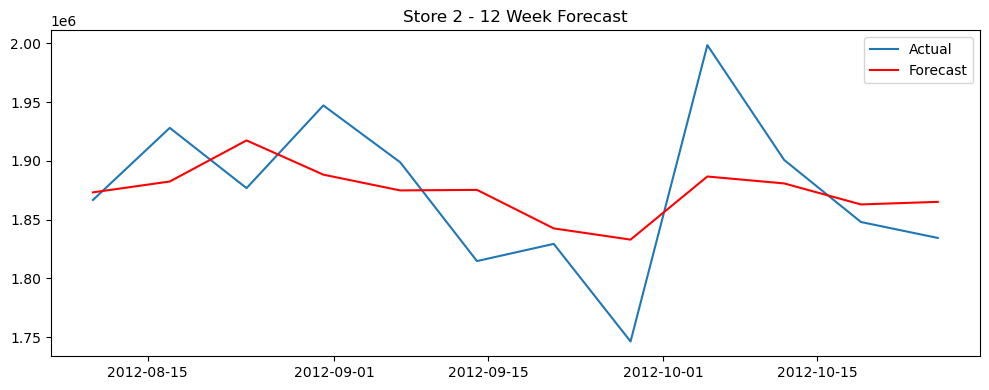


 Training XGBoost for Store 3
MAE: 10357.32


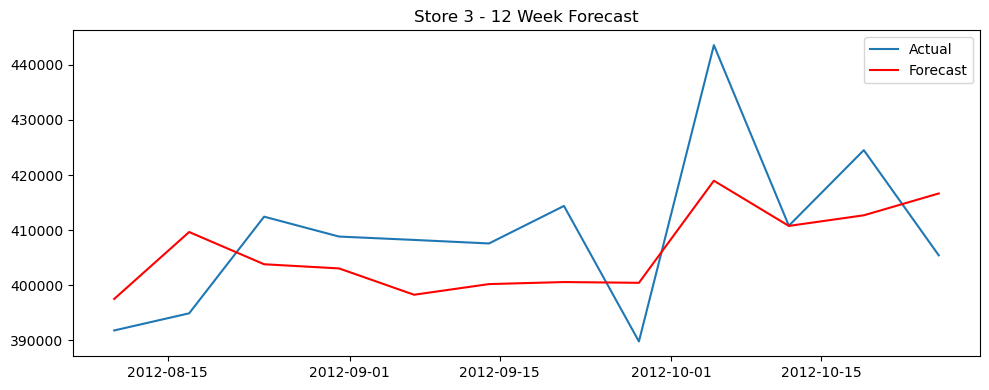


 Training XGBoost for Store 4
MAE: 61245.18


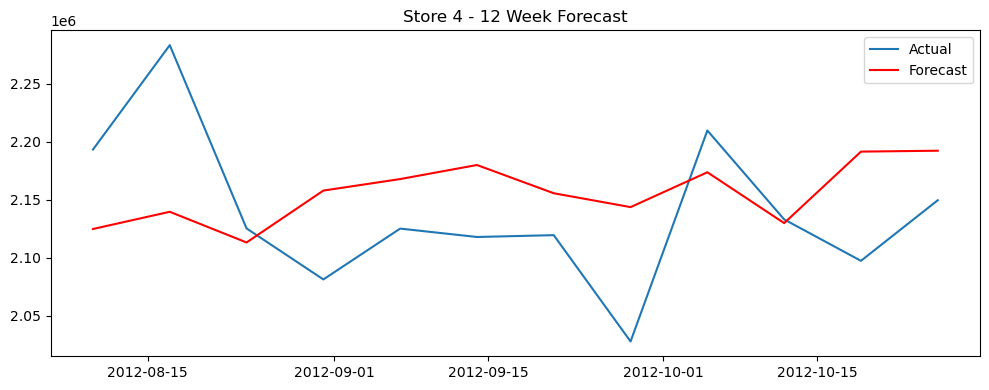


 Training XGBoost for Store 5
MAE: 14222.54


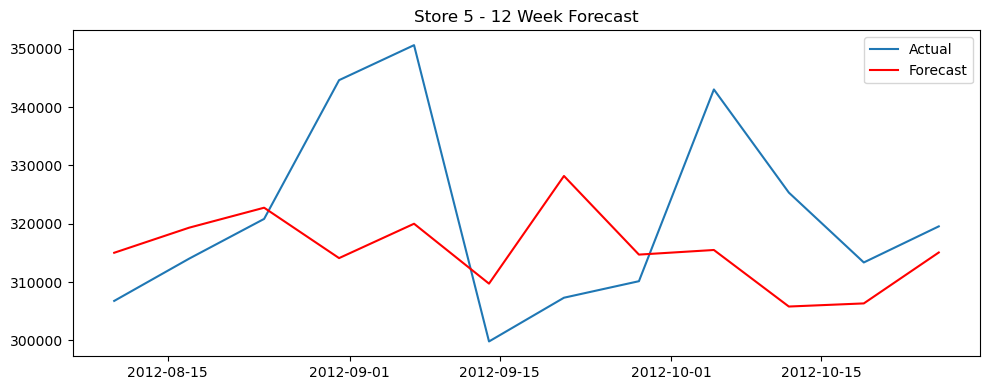


 Training XGBoost for Store 6
MAE: 74922.45


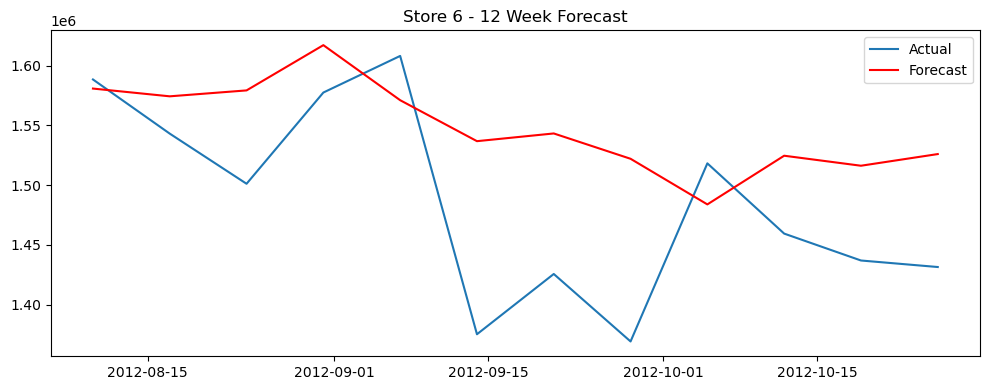


 Training XGBoost for Store 7
MAE: 25809.65


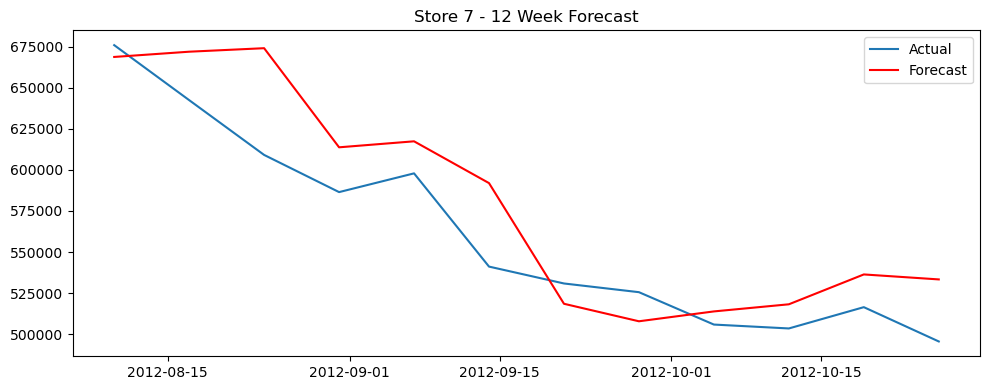


 Training XGBoost for Store 8
MAE: 27698.10


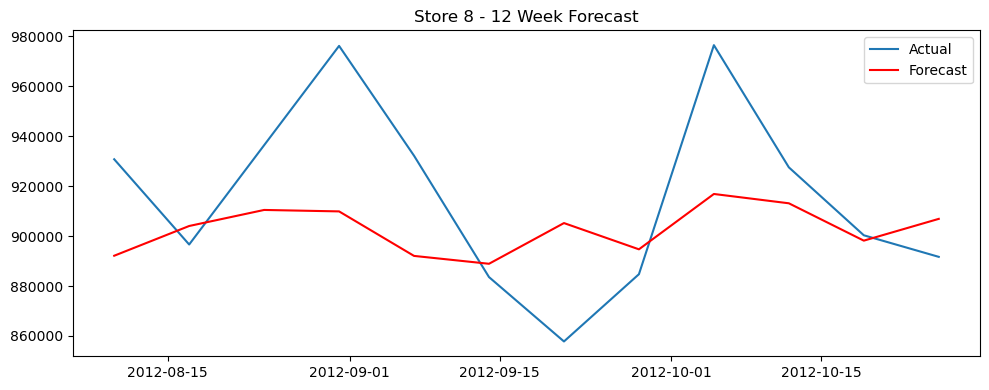


 Training XGBoost for Store 9
MAE: 19779.90


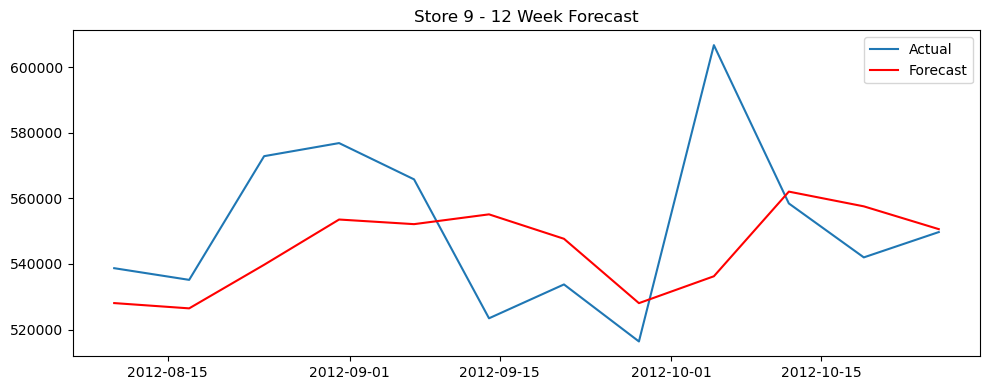


 Training XGBoost for Store 10
MAE: 50268.07


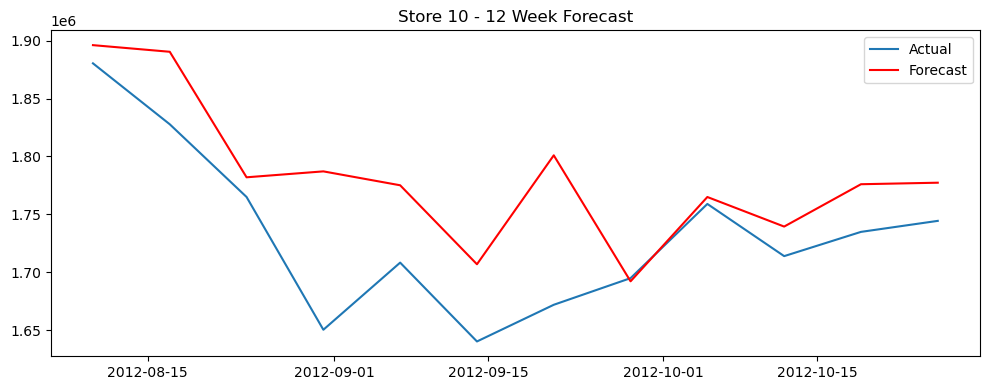


 Training XGBoost for Store 11
MAE: 67107.32


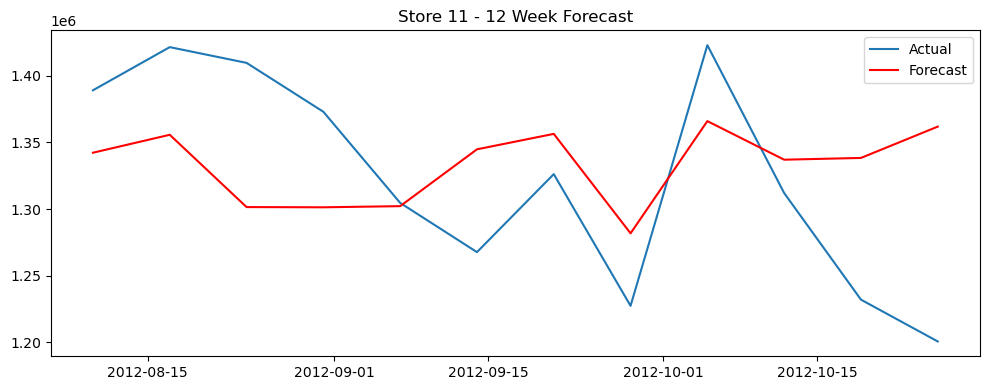


 Training XGBoost for Store 12
MAE: 22710.46


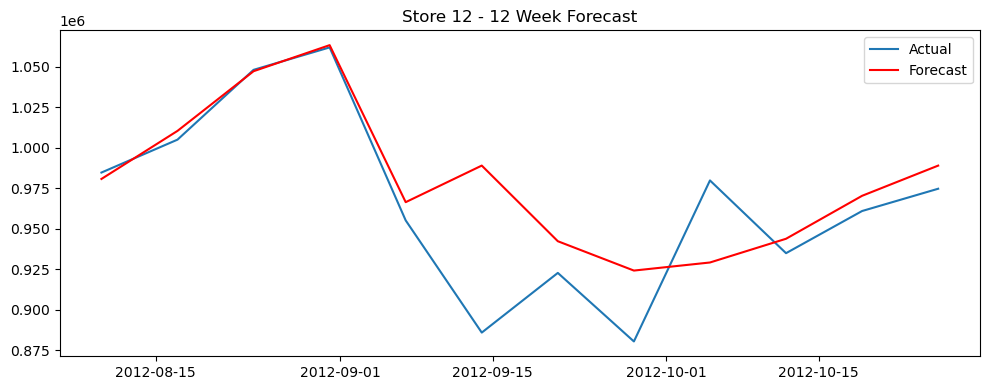


 Training XGBoost for Store 13
MAE: 61679.63


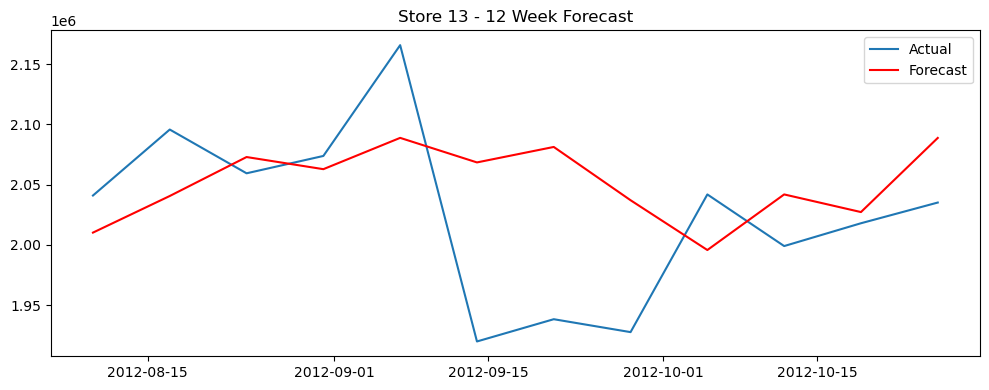


 Training XGBoost for Store 14
MAE: 81231.15


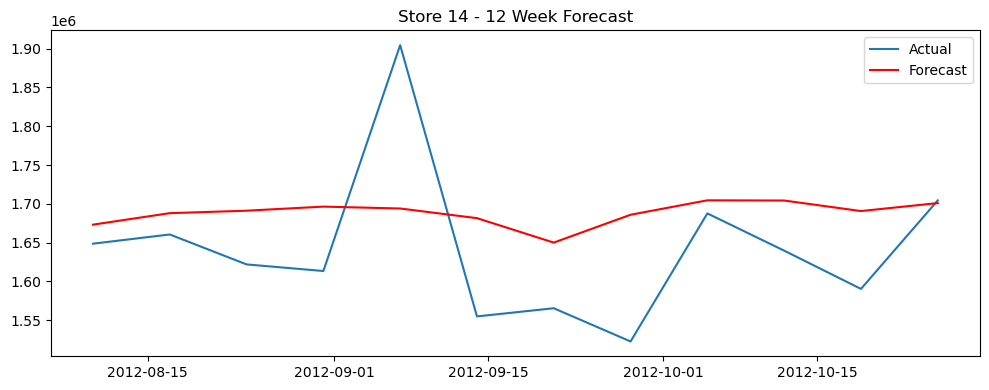


 Training XGBoost for Store 15
MAE: 18984.47


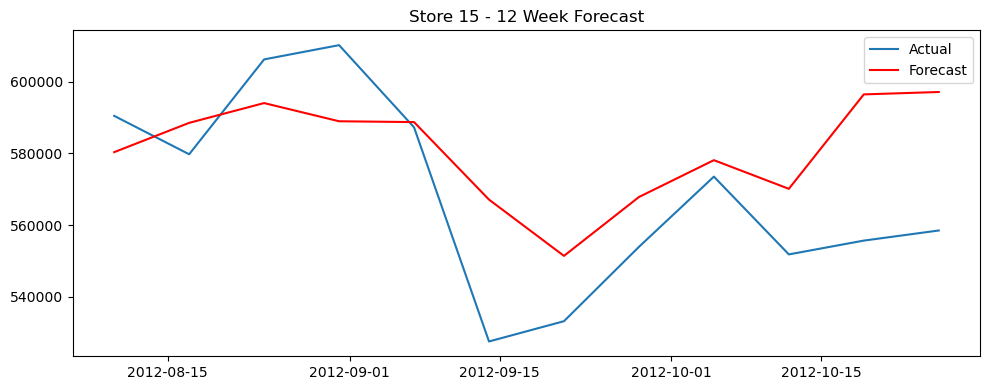


 Training XGBoost for Store 16
MAE: 20863.76


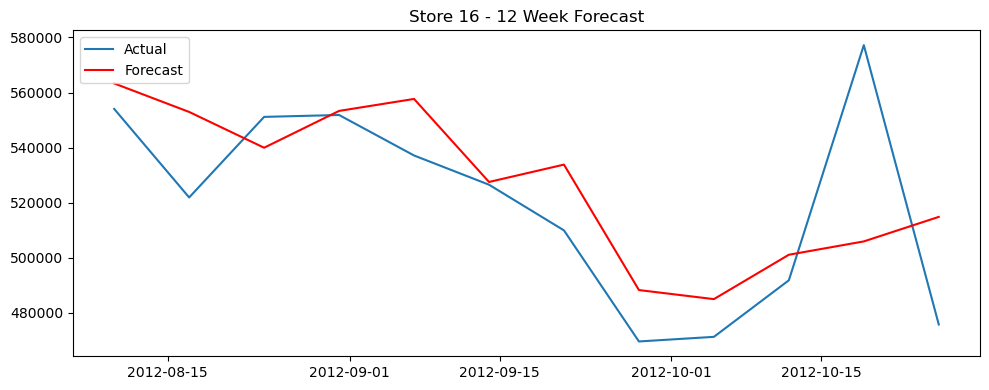


 Training XGBoost for Store 17
MAE: 43756.56


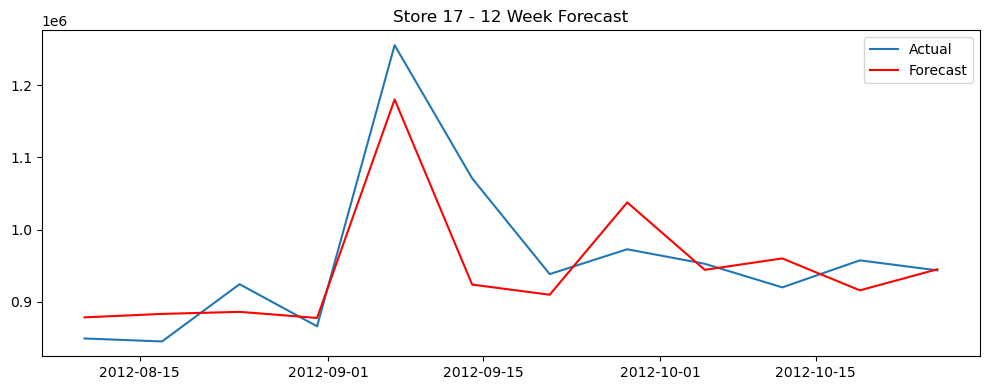


 Training XGBoost for Store 18
MAE: 58171.73


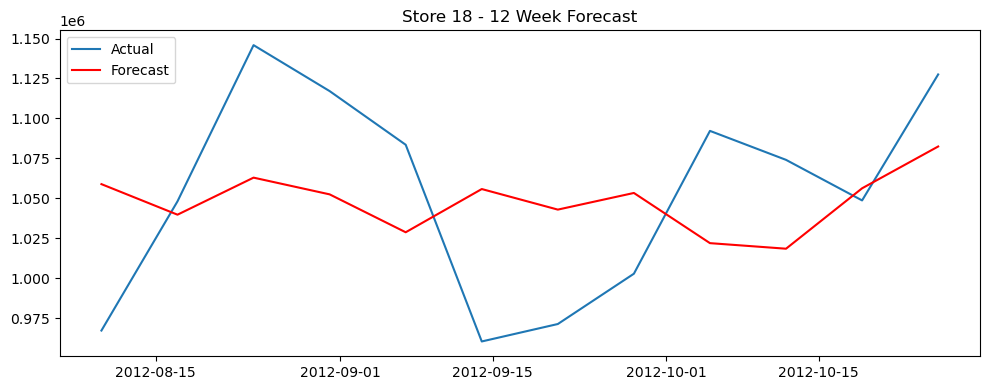


 Training XGBoost for Store 19
MAE: 40754.18


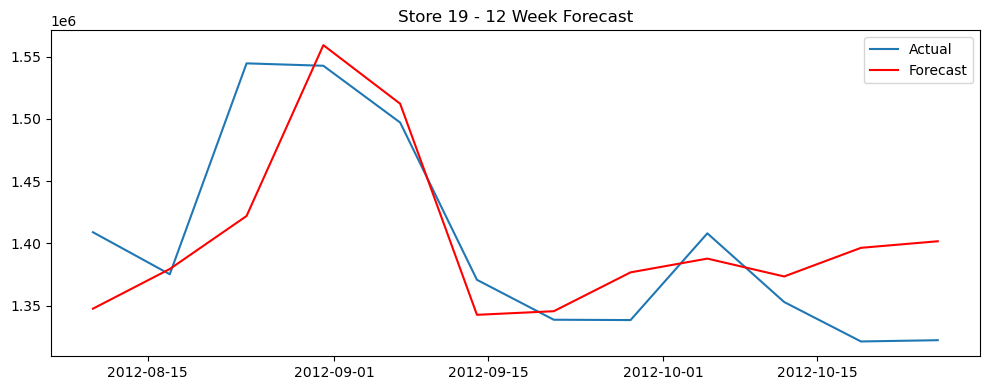


 Training XGBoost for Store 20
MAE: 51382.06


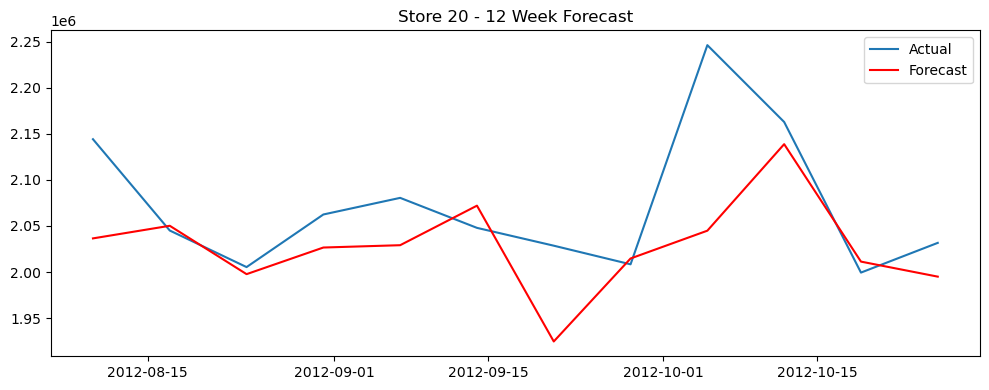


 Training XGBoost for Store 21
MAE: 42011.16


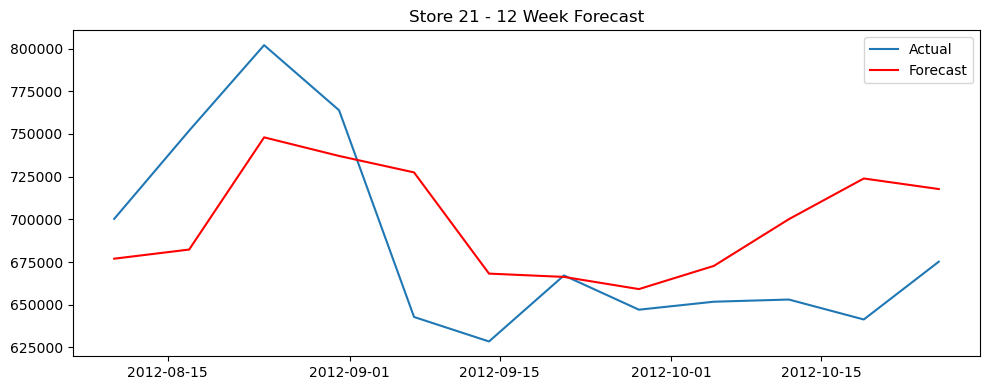


 Training XGBoost for Store 22
MAE: 34501.96


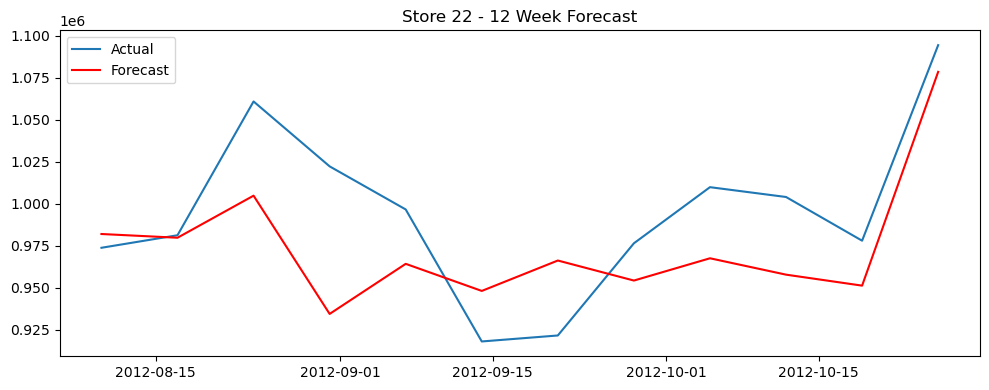


 Training XGBoost for Store 23
MAE: 83259.97


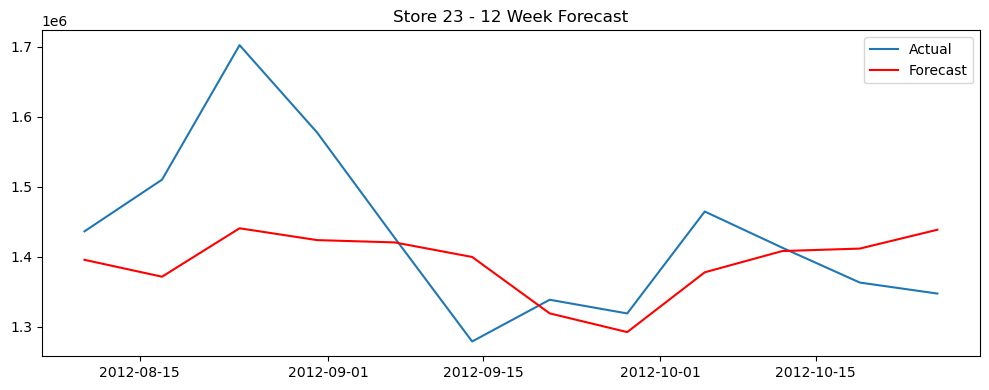


 Training XGBoost for Store 24
MAE: 61834.54


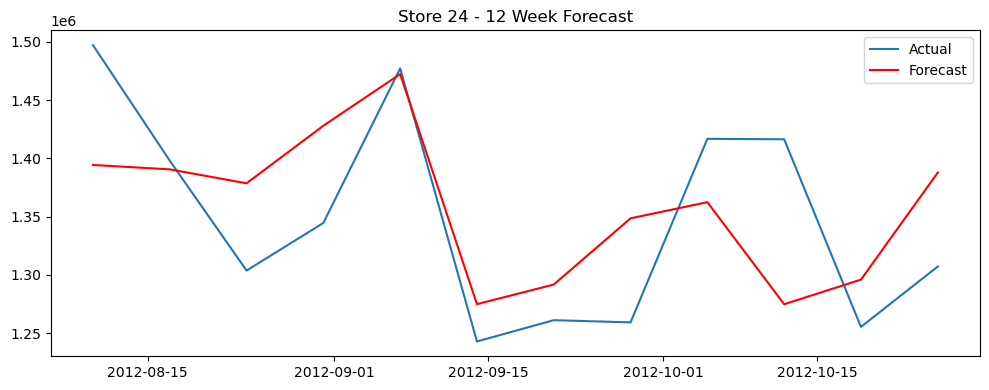


 Training XGBoost for Store 25
MAE: 18317.20


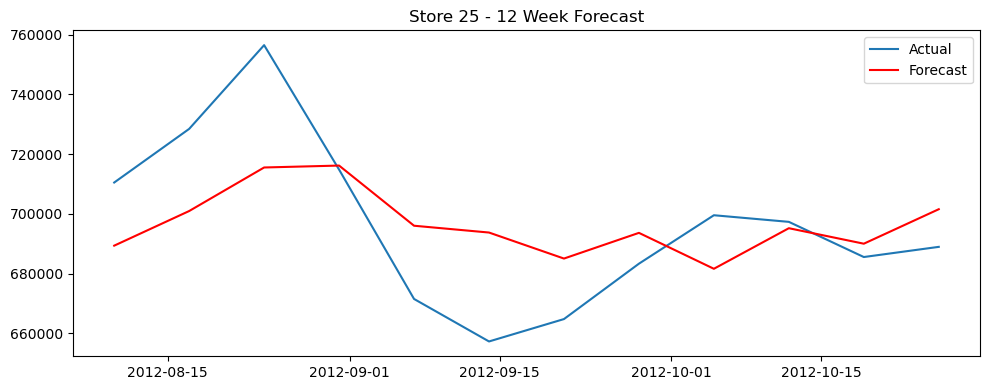


 Training XGBoost for Store 26
MAE: 44295.78


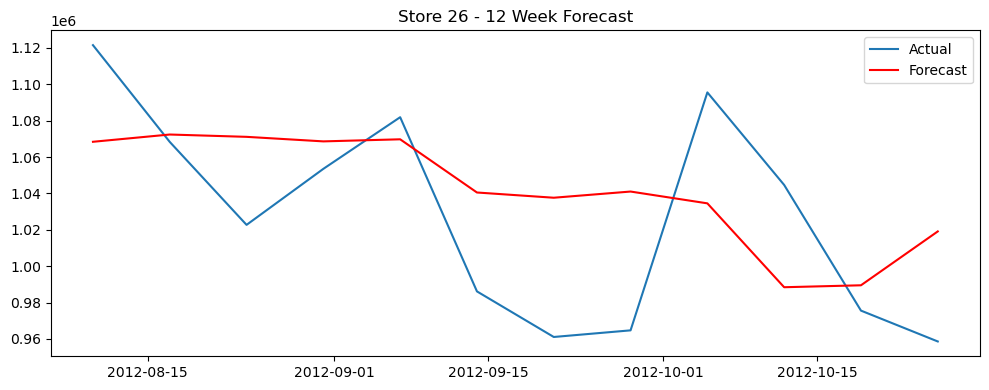


 Training XGBoost for Store 27
MAE: 70661.71


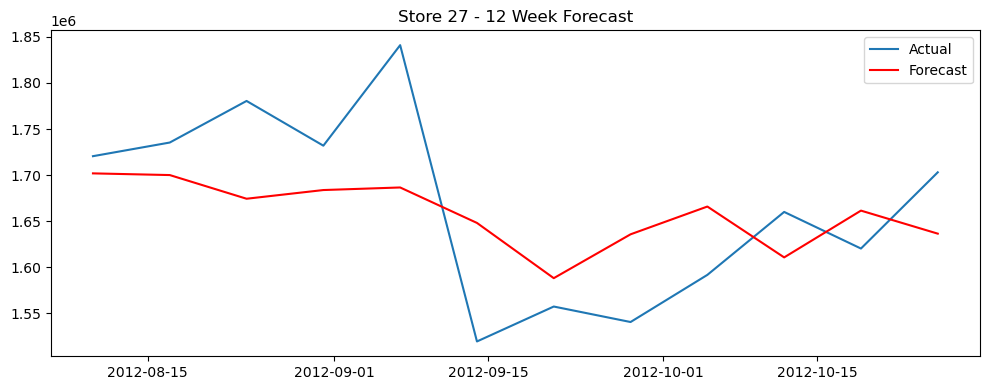


 Training XGBoost for Store 28
MAE: 112490.20


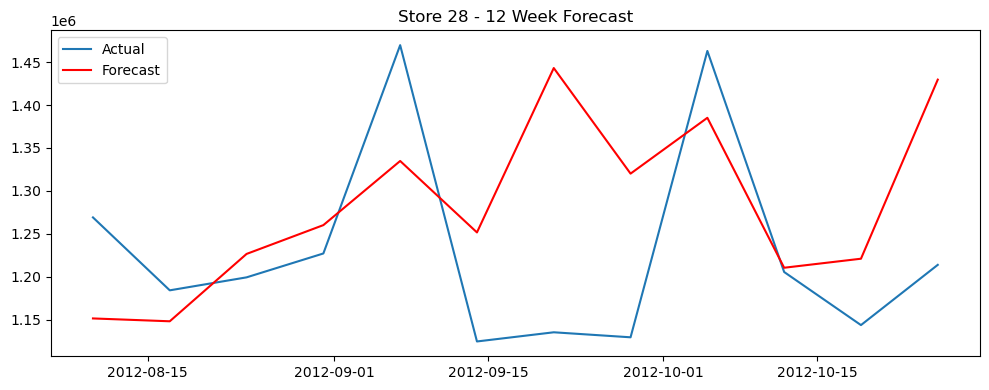


 Training XGBoost for Store 29
MAE: 29956.80


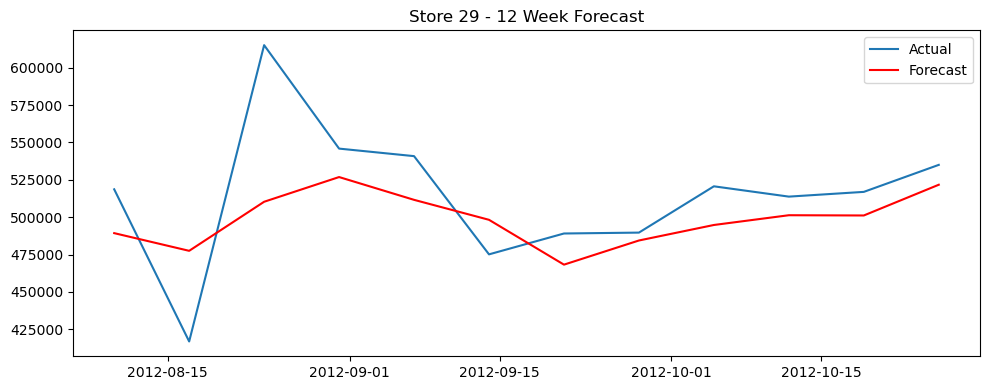


 Training XGBoost for Store 30
MAE: 7376.70


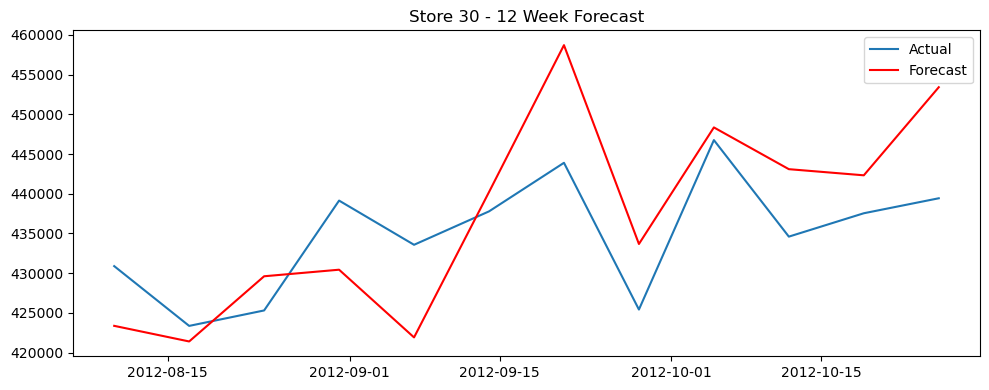


 Training XGBoost for Store 31
MAE: 27345.64


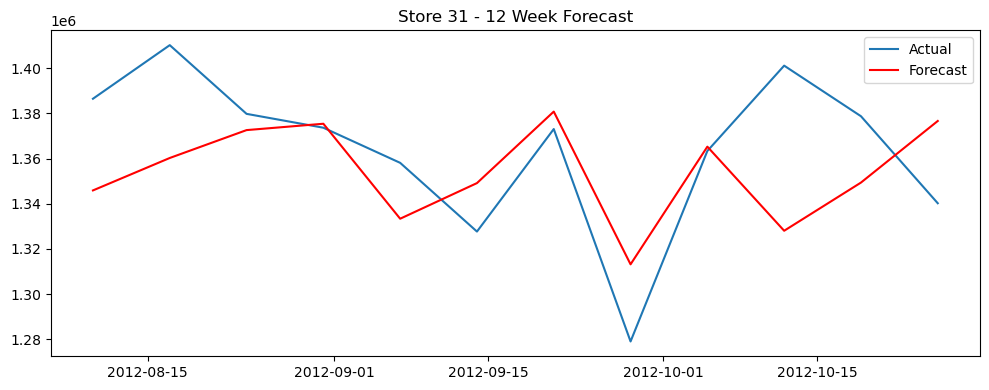


 Training XGBoost for Store 32
MAE: 28115.47


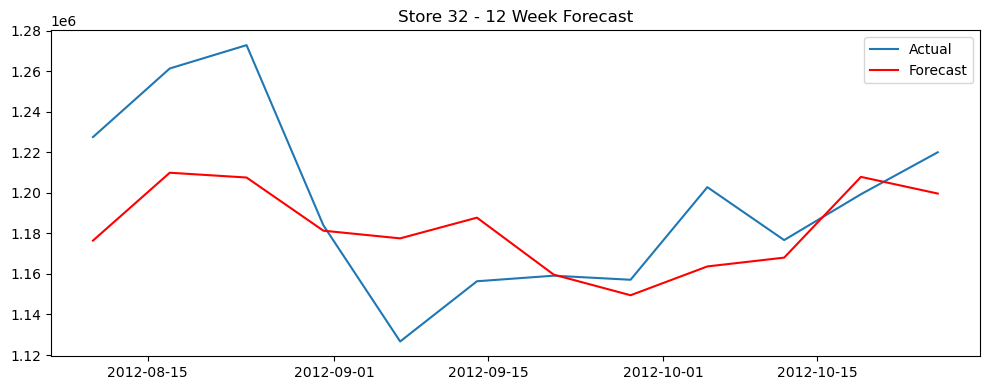


 Training XGBoost for Store 33
MAE: 15840.61


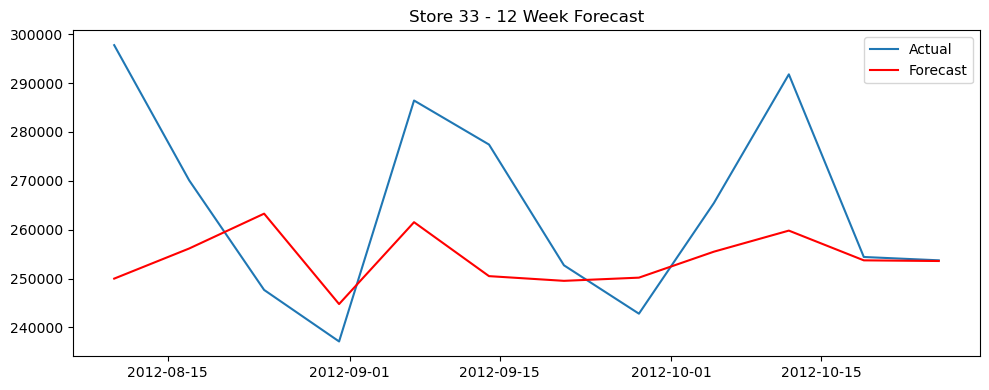


 Training XGBoost for Store 34
MAE: 21248.02


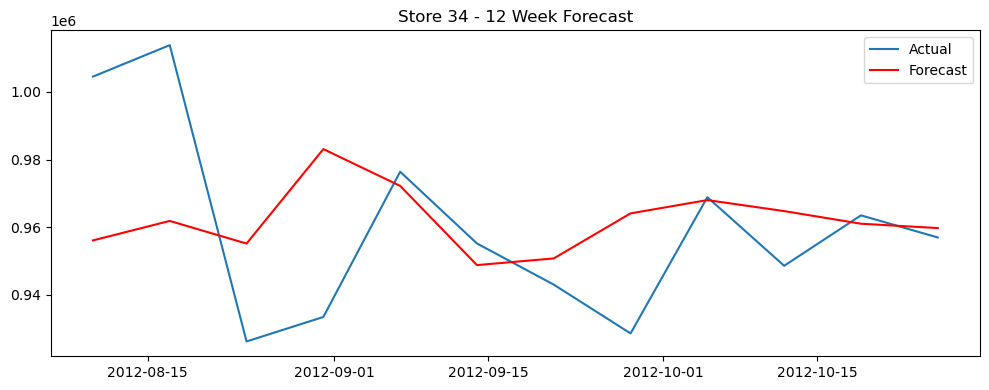


 Training XGBoost for Store 35
MAE: 41501.38


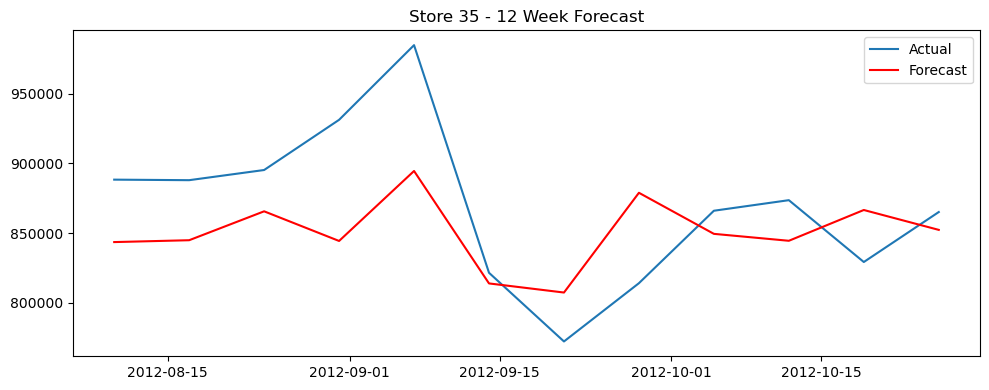


 Training XGBoost for Store 36
MAE: 16577.13


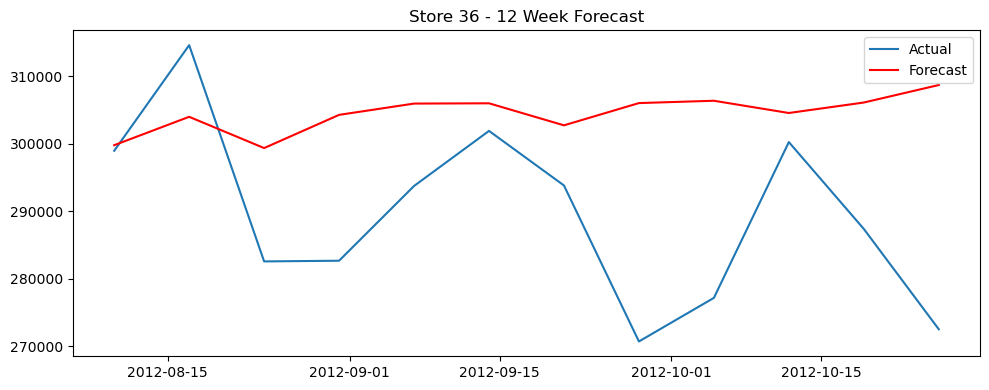


 Training XGBoost for Store 37
MAE: 10499.83


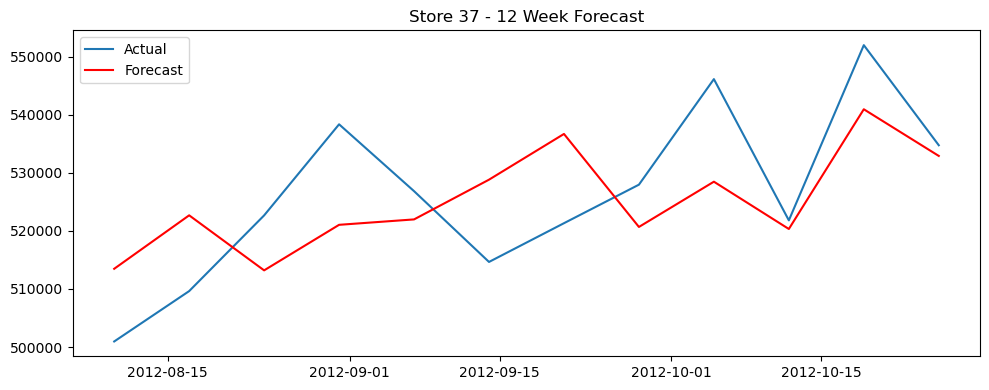


 Training XGBoost for Store 38
MAE: 26590.27


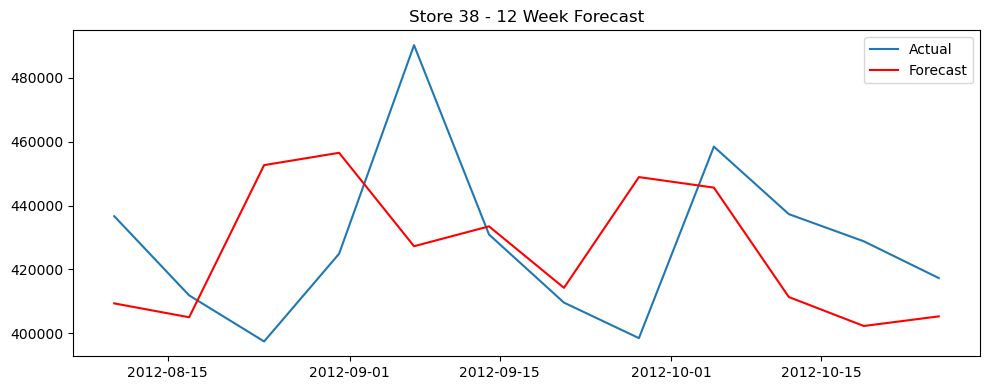


 Training XGBoost for Store 39
MAE: 89062.36


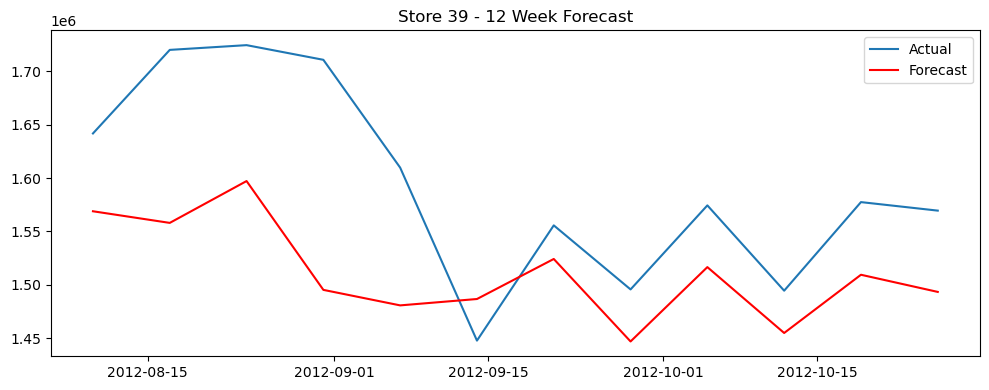


 Training XGBoost for Store 40
MAE: 69282.01


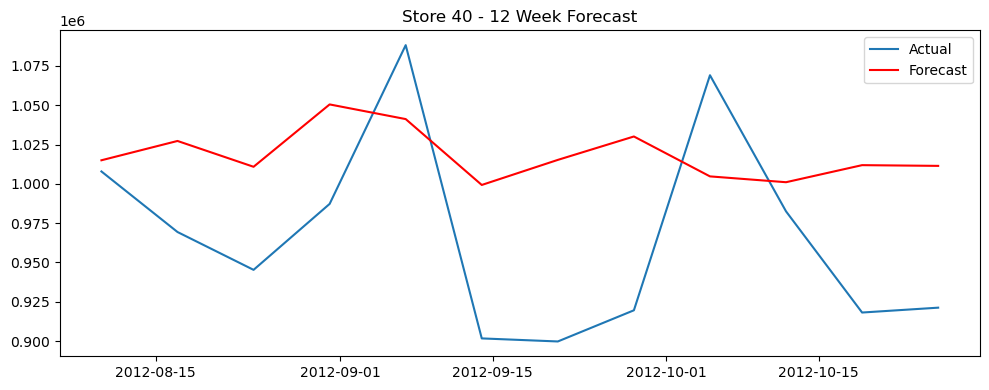


 Training XGBoost for Store 41
MAE: 62251.42


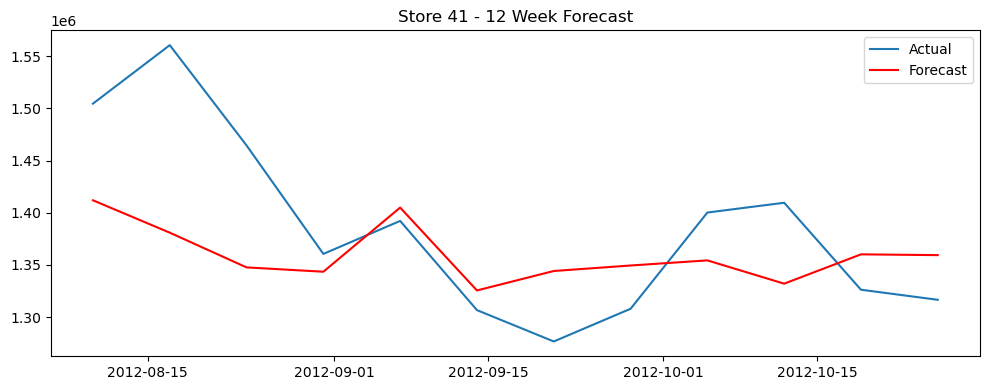


 Training XGBoost for Store 42
MAE: 30781.68


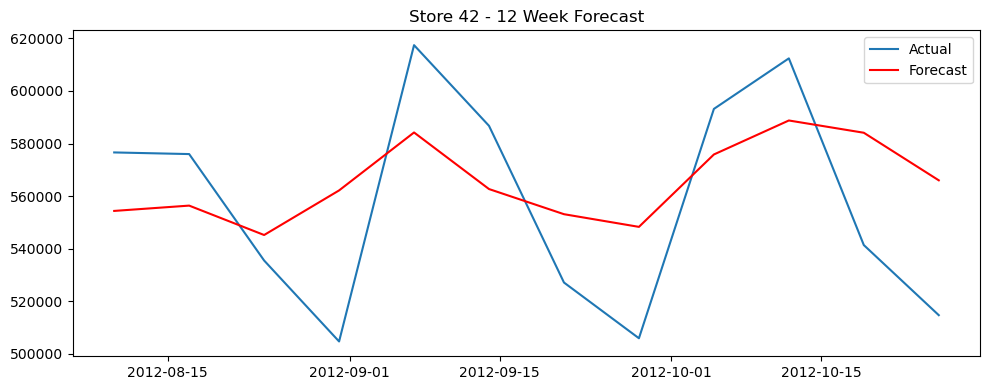


 Training XGBoost for Store 43
MAE: 24295.73


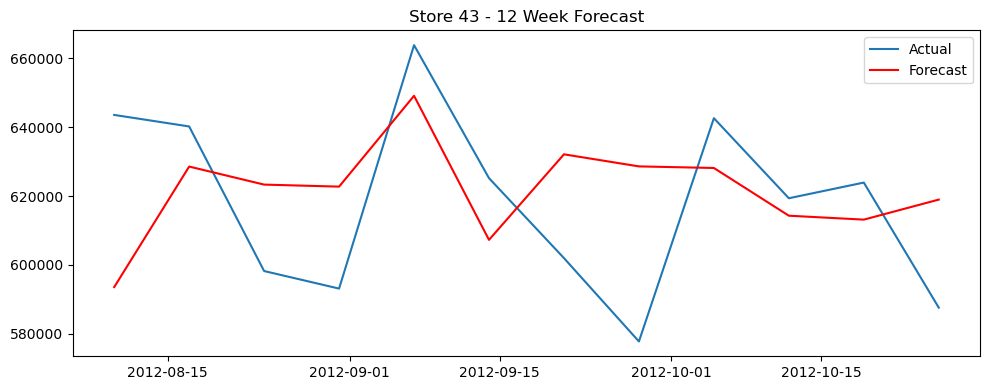


 Training XGBoost for Store 44
MAE: 22109.79


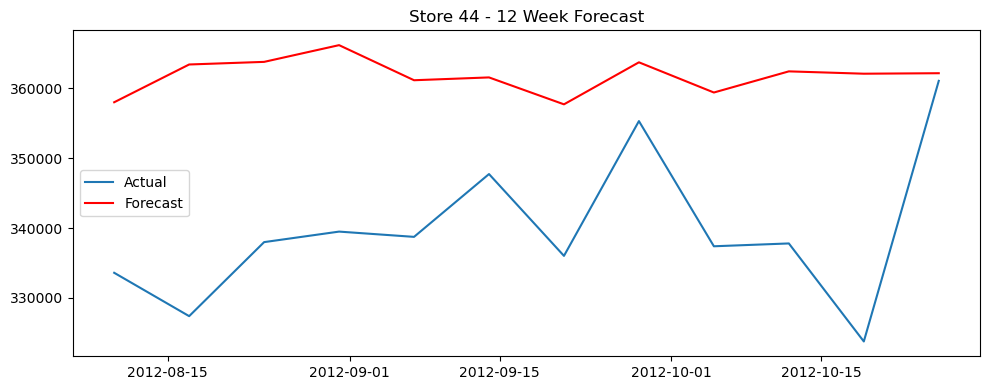


 Training XGBoost for Store 45
MAE: 14862.05


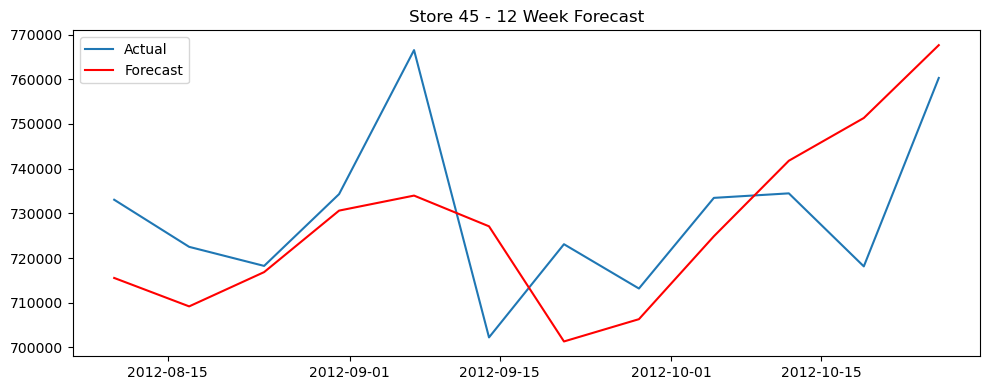

In [40]:
# Lag and rolling Features
df['Lag_1'] = df.groupby('Store')['Weekly_Sales'].shift(1)
df['Rolling_Mean_4'] = df.groupby('Store')['Weekly_Sales'].transform(lambda x: x.rolling(4).mean())

# Drop rows with NA from lag/rolling

df.dropna(inplace = True)

# Define Features and Target
features = [
    'Store', 'Week', 'Month', 'Year', 'Holiday_Flag',
    'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
    'Lag_1', 'Rolling_Mean_4'
]
target = 'Weekly_Sales'

# Train and Forecast for Each Store
store_forecasts = {}

for store_id in df['Store'].unique():
    print(f"\n Training XGBoost for Store {store_id}")
    
    store_df = df[df['Store'] == store_id].copy()
    
    # Train-test split: last 12 weeks as test
    store_df = store_df.sort_values('Date')
    train_df = store_df.iloc[:-12]
    test_df = store_df.iloc[-12:]
    
    X_train = train_df[features]
    y_train = train_df[target]
    X_test = test_df[features]
    y_test = test_df[target]
    
    # Train model
    model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1)
    model.fit(X_train, y_train)
    
    # Predict
    preds = model.predict(X_test)
    store_forecasts[store_id] = preds
    
    # Evaluate
    mae = mean_absolute_error(y_test, preds)
    print(f"MAE: {mae:.2f}")
    
    # Plot
    plt.figure(figsize=(10, 4))
    plt.plot(test_df['Date'], y_test, label='Actual')
    plt.plot(test_df['Date'], preds, label='Forecast', color='red')
    plt.title(f'Store {store_id} - 12 Week Forecast')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [42]:
# Combine Forecasts
forecast_df = pd.DataFrame()

for store_id, preds in store_forecasts.items():
    dates = df[df['Store'] == store_id].sort_values('Date').iloc[-12:]['Date'].values
    temp_df = pd.DataFrame({
        'Store': store_id,
        'Date': dates,
        'Forecasted_Sales': preds
    })
    forecast_df = pd.concat([forecast_df, temp_df], ignore_index=True)

forecast_df.head(12)

,Store,Date,Forecasted_Sales
0,1,2012-08-10,1573342.000
1,1,2012-08-17,1538336.875
2,1,2012-08-24,1545132.500
3,1,2012-08-31,1561062.000
4,1,2012-09-07,1622466.625
5,1,2012-09-14,1622031.250
6,1,2012-09-21,1522343.250
7,1,2012-09-28,1500062.500
8,1,2012-10-05,1608516.000
9,1,2012-10-12,1584192.625


In [48]:
forecast_df.tail(12)

,Store,Date,Forecasted_Sales
528,45,2012-08-10,715537.8750
529,45,2012-08-17,709177.4375
530,45,2012-08-24,716845.0000
531,45,2012-08-31,730605.5000
532,45,2012-09-07,733964.9375
533,45,2012-09-14,727092.1250
534,45,2012-09-21,701330.0625
535,45,2012-09-28,706316.2500
536,45,2012-10-05,724865.8125
537,45,2012-10-12,741764.7500


In [49]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year,Lag_1,Rolling_Mean_4
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,8,2,2010,1611968.17,1.576836e+06
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,9,3,2010,1409727.59,1.554615e+06
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106,10,3,2010,1554806.68,1.504011e+06
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106,11,3,2010,1439541.59,1.469148e+06
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106,12,3,2010,1472515.79,1.467823e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,39,9,2012,723086.20,7.262528e+05
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,40,10,2012,713173.95,7.179884e+05
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,41,10,2012,733455.07,7.260449e+05
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,42,10,2012,734464.36,7.248047e+05
